In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
import time
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler



In [5]:
import pandas as pd
data=pd.read_csv("order_clean_join_all.csv")

/var/folders/t7/xczddm710m57x41dn5pwy_s80000gn/T/ipykernel_61725/3457535292.py:2: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("order_clean_join_all.csv")


In [6]:
data.head()

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,gender,dob,LOCATION_TYPE,latitude,longitude,latitude_vendor,longtitude_vendor,vendor_category_en,delivery_charge,vendor_tag_name
0,163238.0,92PEE24,1.0,7.6,2,0,0.0,0.0,No,No,...,Male,NaN,Other,-0.132100,-78.575297,-0.967769,0.080839,Restaurants,0.0,"American,Burgers,Free Delivery,Hot Dogs,Pasta"
1,163240.0,QS68UD8,1.0,8.7,1,0,0.0,0.0,No,No,...,Unknown,NaN,Work,-0.393396,-78.544417,-1.271979,0.028832,Restaurants,0.0,"Burgers,Desserts,Free Delivery,Grills,Mexican"
2,163241.0,MB7VY5F,2.0,14.4,1,0,0.0,0.0,No,No,...,Unknown,NaN,Other,-1.072823,-78.464121,-0.927944,0.145900,Restaurants,0.7,"Breakfast,Desserts,Salads,Arabic"
3,163244.0,KDJ951Y,1.0,7.1,1,0,0.0,0.0,No,No,...,Male,NaN,Home,-0.292713,-78.556316,-0.601096,0.095998,Restaurants,0.0,"American,Burgers,Desserts,Mojitos ,Pasta"
4,163245.0,BAL0RVT,4.0,27.2,1,0,0.0,0.0,No,No,...,Male,NaN,Work,-0.231810,-78.563513,-0.927944,0.145900,Restaurants,0.7,"Breakfast,Desserts,Salads,Arabic"


In [7]:
temp=data['vendor_tag_name'].str.get_dummies(sep=',')
data=pd.concat([data.drop(columns=['vendor_tag_name']), temp], axis=1)

In [8]:
data.columns

Index(['akeed_order_id', 'customer_id', 'item_count', 'grand_total',
       'payment_mode', 'promo_code', 'vendor_discount_amount',
       'promo_code_discount_percentage', 'is_favorite', 'is_rated',
       'vendor_rating', 'driver_rating', 'deliverydistance', 'preparationtime',
       'order_accepted_time', 'driver_accepted_time', 'ready_for_pickup_time',
       'picked_up_time', 'delivered_time', 'delivery_date', 'vendor_id',
       'created_at', 'LOCATION_NUMBER', 'gender', 'dob', 'LOCATION_TYPE',
       'latitude', 'longitude', 'latitude_vendor', 'longtitude_vendor',
       'vendor_category_en', 'delivery_charge', 'American', 'Arabic', 'Asian',
       'Bagels', 'Biryani', 'Breakfast', 'Burgers', 'Cafe', 'Cakes', 'Chinese',
       'Churros', 'Coffee', 'Combos', 'Crepes', 'Desserts', 'Dimsum', 'Donuts',
       'Family Meal', 'Fatayers', 'Free Delivery', 'Fresh Juices', 'Fries',
       'Frozen yoghurt', 'Grills', 'Healthy Food', 'Hot Chocolate', 'Hot Dogs',
       'Ice creams', 'India

In [9]:
columns=['customer_id','American', 'Arabic', 'Asian',
       'Bagels', 'Biryani', 'Breakfast', 'Burgers', 'Cafe', 'Cakes', 'Chinese',
       'Churros', 'Coffee', 'Combos', 'Crepes', 'Desserts', 'Dimsum', 'Donuts',
       'Family Meal', 'Fatayers', 'Free Delivery', 'Fresh Juices', 'Fries',
       'Frozen yoghurt', 'Grills', 'Healthy Food', 'Hot Chocolate', 'Hot Dogs',
       'Ice creams', 'Indian', 'Italian', 'Japanese', 'Karak', 'Kebabs',
       'Kids meal', 'Kushari', 'Lebanese', 'Manakeesh', 'Mandazi', 'Mexican',
       'Milkshakes', 'Mishkak', 'Mojitos', 'Mojitos ', 'Omani', 'Organic',
       'Pancakes', 'Pasta', 'Pastas', 'Pastry', 'Pizza', 'Pizzas', 'Rice',
       'Rolls', 'Salads', 'Sandwiches', 'Seafood', 'Shawarma', 'Shuwa',
       'Smoothies', 'Soups', 'Spanish Latte', 'Steaks', 'Sushi', 'Sweets',
       'Thai', 'Thali', 'Vegetarian', 'Waffles']
data1=data[columns]

In [10]:
def find_optimal_k(customer_df):
    features = customer_df.drop(columns=['customer_id'])  # Exclude ID
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(features)
    distortions = []
    silhouette_scores = []
    K_range = range(2, 10)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=123, n_init=10)
        labels = kmeans.fit_predict(scaled_features)
        distortions.append(kmeans.inertia_)  # Distortion score
    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax1.set_xlabel("Number of Clusters (k)")
    ax1.set_ylabel("Distortion Score", color="blue")
    ax1.plot(K_range, distortions, marker="o", linestyle="--", color="blue", label="Distortion")
    ax1.tick_params(axis="y", labelcolor="blue")
    plt.title("Elbow Method")
    plt.show()

# Resturant Preferences

## K-Means

In [25]:
df=data1.groupby('customer_id').sum().reset_index()
df=pd.DataFrame(df)
df

,customer_id,American,Arabic,Asian,Bagels,Biryani,Breakfast,Burgers,Cafe,Cakes,...,Smoothies,Soups,Spanish Latte,Steaks,Sushi,Sweets,Thai,Thali,Vegetarian,Waffles
0,000THBA,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,002510Y,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,005ECL6,2,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0075AM7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,009UFS1,1,2,0,0,0,2,3,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27437,ZZVGIVK,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
27438,ZZVLIB5,0,0,9,0,0,1,1,0,0,...,1,9,0,0,0,0,0,0,0,0
27439,ZZWKMGG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27440,ZZY3N0D,2,1,0,0,0,1,2,0,1,...,0,0,0,0,0,0,0,0,0,1


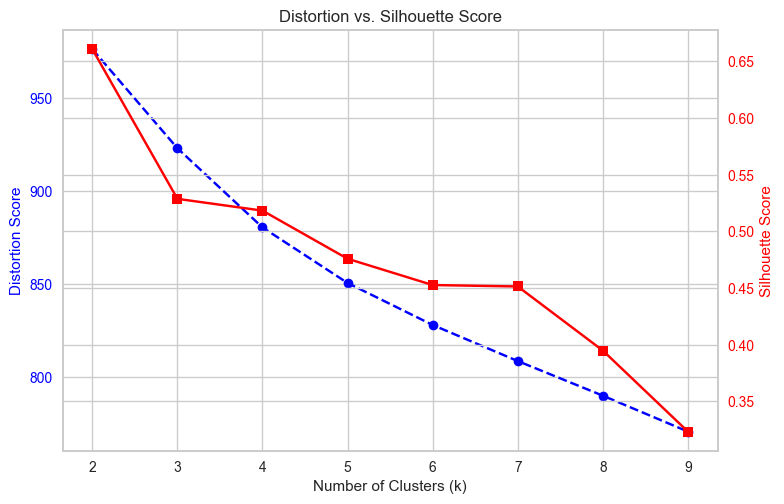

In [186]:
find_optimal_k(df)


- Elbow Method (Distortion Score): The curve bends around k = 4, which suggests this is a good choice for reducing inertia while maintaining a simple structure.
- Silhouette Score: The highest score appears around k = 4 or k = 5, meaning these values provide the most well-defined clusters.

In [27]:
optimal_k = 4
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['customer_id']))
kmeans = KMeans(n_clusters=optimal_k, random_state=123, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
centroids = pd.DataFrame(kmeans.cluster_centers_,columns=df.columns[:-1]).drop(columns=['customer_id'])
centroids

,American,Arabic,Asian,Bagels,Biryani,Breakfast,Burgers,Cafe,Cakes,Chinese,...,Smoothies,Soups,Spanish Latte,Steaks,Sushi,Sweets,Thai,Thali,Vegetarian,Waffles
0,0.007400,0.001238,0.000779,0.001563,0.003145,0.013520,0.004123,0.000527,0.001267,0.003932,...,0.002122,0.000609,0.001513,0.000256,0.000811,0.002184,0.000509,0.000509,0.003559,-7.494005e-15
1,0.045110,0.007000,0.003678,0.004067,0.018133,0.086449,0.021260,0.001546,0.007892,0.011247,...,0.011273,0.001423,0.010191,0.001588,0.005458,0.009490,0.000972,0.000972,0.007205,1.000000e+00
2,0.013866,0.000190,0.000234,0.001329,0.006568,0.048811,0.006910,0.018450,0.007480,0.024778,...,0.002521,0.026274,0.003156,0.000095,0.000943,0.004582,0.000062,0.000062,0.176966,3.333333e-01
3,0.130089,0.028902,0.012759,0.009527,0.059939,0.215518,0.027775,0.008340,0.039872,0.023354,...,0.038395,0.004147,0.039528,0.010054,0.030983,0.036364,0.000714,0.000714,0.018294,6.666667e-01


In [28]:
centroids.apply(lambda row: row.sort_values(ascending=False).index.tolist(), axis=1)

0    [Breakfast, Crepes, Fatayers, Seafood, Kebabs,...
1    [Waffles, Breakfast, Fatayers, Crepes, Kebabs,...
2    [Waffles, Vegetarian, Organic, Dimsum, Hot Dog...
3    [Waffles, Frozen yoghurt, Breakfast, Seafood, ...
dtype: object

Doesnt seem to capture meaningful clusters due to sparsity in the categorical data. Using Lia's food mapping to rim down the columns into broader categories and retry.

## Trimming down categories

In [29]:
df=data1.groupby('customer_id').sum().reset_index()
df=pd.DataFrame(df)


In [30]:
food_mapping = {
    "American": ["American", "Bagels", "Burgers", "Fries", "Grills", "Hot Dogs", "Rolls", "Steaks"],
    "Arabic": ["Arabic", "Fatayers", "Kebabs", "Kushari", "Lebanese", "Manakeesh", "Mandazi", "Omani", "Shawarma", "Shuwa"],
    "Asian": ["Asian", "Biryani", "Chinese", "Dimsum", "Indian", "Japanese", "Rice", "Sushi", "Thai", "Thali"],
    "Desserts": ["Cakes", "Crepes", "Desserts", "Frozen yoghurt", "Ice creams", "Pastry", "Sweets"],
    "Snacks": ["Churros", "Donuts", "Mishkak"],
    "Drinks": ["Coffee", "Fresh Juices", "Hot Chocolate", "Karak", "Milkshakes", "Mojitos", "Spanish Latte"],
    "Health": ["Healthy Food", "Organic", "Salads", "Sandwiches", "Smoothies", "Soups", "Vegetarian"],
    "Italian": ["Italian", "Pasta", "Pastas", "Pizza", "Pizzas"],
    "Mexican": ["Mexican"],
    "Seafood": ["Seafood"],
    "Breakfast": ["Breakfast", "Pancakes", "Waffles"]
}

In [31]:
columns_to_keep = set(sum(food_mapping.values(), [])) 
customer_df_filtered = df[["customer_id"] + [col for col in df.columns if col in columns_to_keep]]
trim_df = pd.DataFrame()
trim_df["customer_id"] = customer_df_filtered["customer_id"]
for category, tags in food_mapping.items():
    available_tags = [tag for tag in tags if tag in customer_df_filtered.columns]
    if available_tags:
        trim_df[category] = customer_df_filtered[available_tags].sum(axis=1)
    else:
        trim_df[category] = 0 

In [32]:
trim_df

,customer_id,American,Arabic,Asian,Desserts,Snacks,Drinks,Health,Italian,Mexican,Seafood,Breakfast
0,000THBA,2,1,0,0,0,0,1,1,0,0,1
1,002510Y,0,0,4,1,0,0,1,0,0,0,0
2,005ECL6,6,0,0,2,2,0,4,2,0,0,0
3,0075AM7,0,1,0,0,0,0,1,1,0,0,0
4,009UFS1,7,4,0,2,0,0,3,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
27437,ZZVGIVK,1,0,0,2,0,0,3,4,0,0,1
27438,ZZVLIB5,13,0,36,1,0,3,12,0,0,0,1
27439,ZZWKMGG,0,1,0,0,0,2,1,0,0,0,0
27440,ZZY3N0D,8,5,0,6,1,11,4,2,0,0,3


## Kmeans

In [33]:
optimal_k = 3
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(trim_df.drop(columns=['customer_id']))
kmeans = KMeans(n_clusters=optimal_k, random_state=123, n_init=10)
trim_df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
trim_df

,customer_id,American,Arabic,Asian,Desserts,Snacks,Drinks,Health,Italian,Mexican,Seafood,Breakfast,KMeans_Cluster
0,000THBA,2,1,0,0,0,0,1,1,0,0,1,0
1,002510Y,0,0,4,1,0,0,1,0,0,0,0,0
2,005ECL6,6,0,0,2,2,0,4,2,0,0,0,0
3,0075AM7,0,1,0,0,0,0,1,1,0,0,0,0
4,009UFS1,7,4,0,2,0,0,3,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27437,ZZVGIVK,1,0,0,2,0,0,3,4,0,0,1,0
27438,ZZVLIB5,13,0,36,1,0,3,12,0,0,0,1,0
27439,ZZWKMGG,0,1,0,0,0,2,1,0,0,0,0,0
27440,ZZY3N0D,8,5,0,6,1,11,4,2,0,0,3,2


In [36]:
centroids = pd.DataFrame(kmeans.cluster_centers_,columns=trim_df.columns[:-1]).drop(columns=['customer_id'])
centroids

,American,Arabic,Asian,Desserts,Snacks,Drinks,Health,Italian,Mexican,Seafood,Breakfast
0,0.008512,0.002370,0.005908,0.005231,0.003852,0.003611,0.002435,0.002120,0.000403,0.003991,5.065393e-15
1,0.045452,0.008687,0.028031,0.040349,0.023864,0.018968,0.012102,0.014861,0.004482,0.021986,5.000000e-01
2,0.146828,0.019489,0.069860,0.125253,0.069750,0.060788,0.031456,0.040404,0.022854,0.063686,1.000000e+00


In [37]:
centroids.apply(lambda row: row.sort_values(ascending=False).index.tolist(), axis=1)

0    [American, Asian, Desserts, Seafood, Snacks, D...
1    [Breakfast, American, Desserts, Asian, Snacks,...
2    [Breakfast, American, Desserts, Asian, Snacks,...
dtype: object

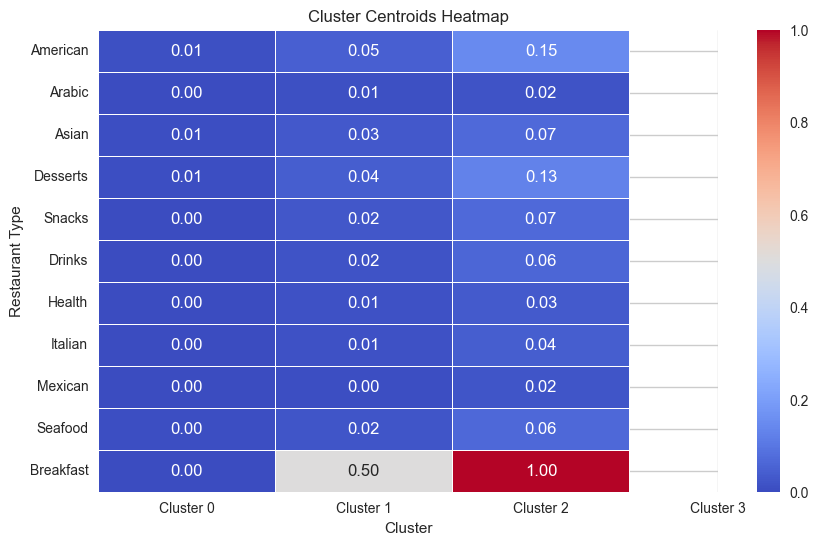

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(centroids.T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(ticks=np.arange(4) + 0.5, labels=["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"])
plt.title("Cluster Centroids Heatmap")
plt.xlabel("Cluster")
plt.ylabel("Restaurant Type")
plt.show()

In [39]:
trim_df.sum()

customer_id       000THBA002510Y005ECL60075AM7009UFS100F8I3F00FQ...
American                                                     149114
Arabic                                                        55529
Asian                                                         44608
Desserts                                                      91772
Snacks                                                        11158
Drinks                                                        45438
Health                                                       113955
Italian                                                       51856
Mexican                                                        3154
Seafood                                                         606
Breakfast                                                     38124
KMeans_Cluster                                                 4839
dtype: object

Still isn't showing meaningful clusters due to imbalance data as shown above. Some tags are overrepresented. To Prevent dominance, try log scaling and TF-IDF to prevent overweight influence of frequent tags.

### Log Scaling

In [36]:
from sklearn.preprocessing import FunctionTransformer
numerical_columns = [col for col in trim_df.columns if col not in ['customer_id', 'KMeans_Cluster']]
# Apply log scaling (log1p to handle zero values)
log_transformer = FunctionTransformer(np.log1p, validate=True)
trimmed_df_log_scaled = trim_df.copy()
trimmed_df_log_scaled[numerical_columns] = log_transformer.transform(trim_df[numerical_columns])

/Users/lizongzhen/opt/anaconda3/envs/deeplearning/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [37]:
trimmed_df_log_scaled.drop(columns=['KMeans_Cluster'])
optimal_k = 3
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(trimmed_df_log_scaled.drop(columns=['customer_id']))
kmeans = KMeans(n_clusters=optimal_k, random_state=123, n_init=10)
trimmed_df_log_scaled['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

In [42]:
centroids = pd.DataFrame(kmeans.cluster_centers_,columns=trimmed_df_log_scaled.columns[:-1]).drop(columns=['customer_id'])
centroids

,American,Arabic,Asian,Desserts,Snacks,Drinks,Health,Italian,Mexican,Seafood,Breakfast
0,0.340498,0.144515,0.375727,0.192435,0.260655,0.364098,0.244429,0.052792,0.017227,0.278033,0.557478
1,0.078165,0.044244,0.094117,0.025200,0.047120,0.093239,0.038550,0.007988,0.000571,0.039021,0.000616
2,0.155399,0.082116,0.240495,0.043816,0.105511,0.235097,0.140180,0.013356,0.003308,0.147207,0.001230


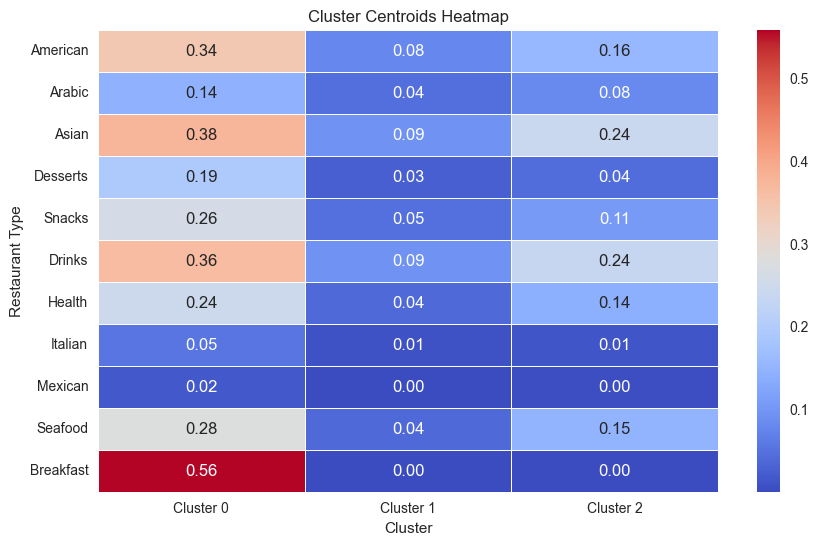

In [212]:
plt.figure(figsize=(10,6))
sns.heatmap(centroids.T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(ticks=np.arange(3) + 0.5, labels=["Cluster 0", "Cluster 1", "Cluster 2"])
plt.title("Cluster Centroids Heatmap")
plt.xlabel("Cluster")
plt.ylabel("Restaurant Type")
plt.show()

Better but cluster 0 is still too generalized. Try TF-IDF.

### TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tfidf_scaled = tfidf_transformer.fit_transform(trim_df[numerical_columns])
trimmed_df_tfidf_scaled = trim_df.copy()
trimmed_df_tfidf_scaled[numerical_columns] = pd.DataFrame(tfidf_scaled.toarray(), columns=numerical_columns)
trimmed_df_tfidf_scaled


,customer_id,American,Arabic,Asian,Desserts,Snacks,Drinks,Health,Italian,Mexican,Seafood,Breakfast,KMeans_Cluster
0,000THBA,0.639155,0.390793,0.000000,0.000000,0.000000,0.000000,0.294909,0.424689,0.0,0.0,0.414041,0
1,002510Y,0.000000,0.000000,0.981434,0.139184,0.000000,0.000000,0.131964,0.000000,0.0,0.0,0.000000,0
2,005ECL6,0.690752,0.000000,0.000000,0.224103,0.445452,0.000000,0.424955,0.305982,0.0,0.0,0.000000,0
3,0075AM7,0.000000,0.602969,0.000000,0.000000,0.000000,0.000000,0.455027,0.655270,0.0,0.0,0.000000,0
4,009UFS1,0.726417,0.507596,0.000000,0.202006,0.000000,0.000000,0.287290,0.137906,0.0,0.0,0.268896,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27437,ZZVGIVK,0.153596,0.000000,0.000000,0.298989,0.000000,0.000000,0.425218,0.816458,0.0,0.0,0.198997,0
27438,ZZVLIB5,0.202301,0.000000,0.961204,0.015146,0.000000,0.069493,0.172325,0.000000,0.0,0.0,0.020161,0
27439,ZZWKMGG,0.000000,0.365228,0.000000,0.000000,0.000000,0.889182,0.275617,0.000000,0.0,0.0,0.000000,0
27440,ZZY3N0D,0.380032,0.290449,0.000000,0.277414,0.091903,0.777838,0.175348,0.126257,0.0,0.0,0.184637,2


In [39]:
trimmed_df_tfidf_scaled.drop(columns=['KMeans_Cluster'])
optimal_k = 3
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(trimmed_df_tfidf_scaled.drop(columns=['customer_id']))
kmeans = KMeans(n_clusters=optimal_k, random_state=123, n_init=10)
trimmed_df_tfidf_scaled['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

In [42]:
trimmed_df_tfidf_scaled

,customer_id,American,Arabic,Asian,Desserts,Snacks,Drinks,Health,Italian,Mexican,Seafood,Breakfast,KMeans_Cluster
0,000THBA,0.639155,0.390793,0.000000,0.000000,0.000000,0.000000,0.294909,0.424689,0.0,0.0,0.414041,1
1,002510Y,0.000000,0.000000,0.981434,0.139184,0.000000,0.000000,0.131964,0.000000,0.0,0.0,0.000000,2
2,005ECL6,0.690752,0.000000,0.000000,0.224103,0.445452,0.000000,0.424955,0.305982,0.0,0.0,0.000000,1
3,0075AM7,0.000000,0.602969,0.000000,0.000000,0.000000,0.000000,0.455027,0.655270,0.0,0.0,0.000000,2
4,009UFS1,0.726417,0.507596,0.000000,0.202006,0.000000,0.000000,0.287290,0.137906,0.0,0.0,0.268896,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27437,ZZVGIVK,0.153596,0.000000,0.000000,0.298989,0.000000,0.000000,0.425218,0.816458,0.0,0.0,0.198997,1
27438,ZZVLIB5,0.202301,0.000000,0.961204,0.015146,0.000000,0.069493,0.172325,0.000000,0.0,0.0,0.020161,2
27439,ZZWKMGG,0.000000,0.365228,0.000000,0.000000,0.000000,0.889182,0.275617,0.000000,0.0,0.0,0.000000,2
27440,ZZY3N0D,0.380032,0.290449,0.000000,0.277414,0.091903,0.777838,0.175348,0.126257,0.0,0.0,0.184637,0


In [43]:
centroids = pd.DataFrame(kmeans.cluster_centers_,columns=trimmed_df_tfidf_scaled.columns[:-1]).drop(columns=['customer_id'])
centroids

,American,Arabic,Asian,Desserts,Snacks,Drinks,Health,Italian,Mexican,Seafood,Breakfast
0,0.228010,0.148728,0.307010,0.111474,0.229127,0.369325,0.211629,0.032857,0.011539,0.227090,0.960187
1,0.098499,0.021855,0.280492,0.041621,0.077599,0.334917,0.277244,0.017422,0.001544,0.177412,0.004789
2,0.315895,0.332730,0.264261,0.079475,0.258359,0.275714,0.060504,0.027496,0.006177,0.141592,0.001872


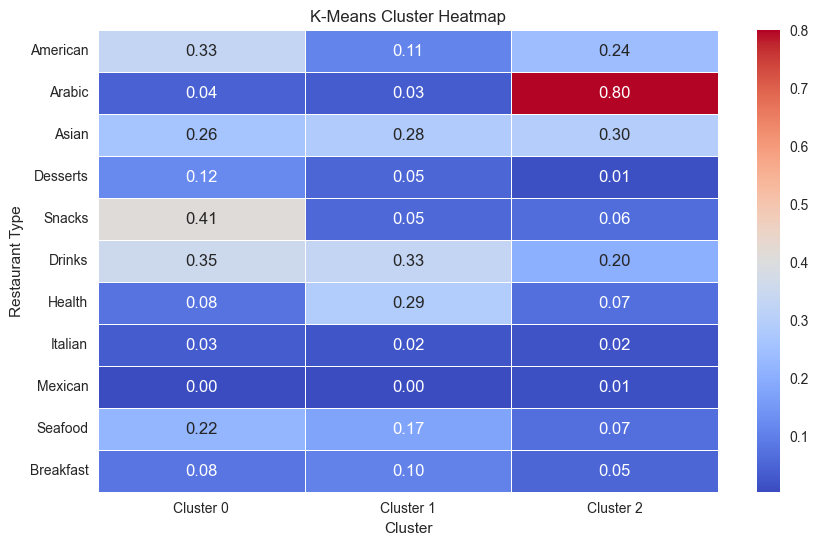

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(centroids.T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(ticks=np.arange(3) + 0.5, labels=["Cluster 0", "Cluster 1", "Cluster 2"])
plt.title("K-Means Cluster Heatmap")
plt.xlabel("Cluster")
plt.ylabel("Restaurant Type")
plt.show()

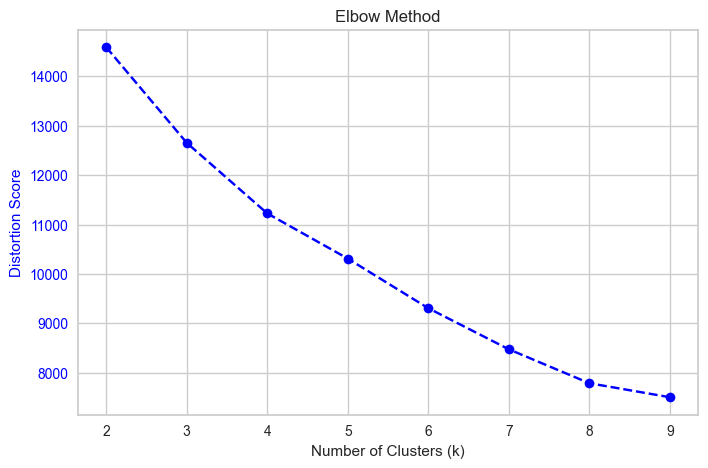

In [44]:
find_optimal_k(trimmed_df_tfidf_scaled) ## cluster 3 looks like the elbow point as well

In [45]:
trimmed_df_tfidf_scaled

,customer_id,American,Arabic,Asian,Desserts,Snacks,Drinks,Health,Italian,Mexican,Seafood,Breakfast,KMeans_Cluster
0,000THBA,0.639155,0.390793,0.000000,0.000000,0.000000,0.000000,0.294909,0.424689,0.0,0.0,0.414041,1
1,002510Y,0.000000,0.000000,0.981434,0.139184,0.000000,0.000000,0.131964,0.000000,0.0,0.0,0.000000,2
2,005ECL6,0.690752,0.000000,0.000000,0.224103,0.445452,0.000000,0.424955,0.305982,0.0,0.0,0.000000,1
3,0075AM7,0.000000,0.602969,0.000000,0.000000,0.000000,0.000000,0.455027,0.655270,0.0,0.0,0.000000,2
4,009UFS1,0.726417,0.507596,0.000000,0.202006,0.000000,0.000000,0.287290,0.137906,0.0,0.0,0.268896,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27437,ZZVGIVK,0.153596,0.000000,0.000000,0.298989,0.000000,0.000000,0.425218,0.816458,0.0,0.0,0.198997,1
27438,ZZVLIB5,0.202301,0.000000,0.961204,0.015146,0.000000,0.069493,0.172325,0.000000,0.0,0.0,0.020161,2
27439,ZZWKMGG,0.000000,0.365228,0.000000,0.000000,0.000000,0.889182,0.275617,0.000000,0.0,0.0,0.000000,2
27440,ZZY3N0D,0.380032,0.290449,0.000000,0.277414,0.091903,0.777838,0.175348,0.126257,0.0,0.0,0.184637,0


Much better result.

Cluster 0 consists of high preferences for american, snacks, and drinks. Label: Fast Food lovers

Cluster 1 consists of high preferences for asian, drinks, health. Label: Asian food lovers

Cluster 2 is dominant by acrabic cuisine and low in other categories. Label: Arabic food lovers

## DBSCAN

In [158]:
trimmed_df_tfidf_scaled=trimmed_df_tfidf_scaled.drop(columns=['KMeans_Cluster'])
trimmed_df_tfidf_scaled

,customer_id,American,Arabic,Asian,Desserts,Snacks,Drinks,Health,Italian,Mexican,Seafood,Breakfast
0,000THBA,0.639155,0.390793,0.000000,0.000000,0.000000,0.000000,0.294909,0.424689,0.0,0.0,0.414041
1,002510Y,0.000000,0.000000,0.981434,0.139184,0.000000,0.000000,0.131964,0.000000,0.0,0.0,0.000000
2,005ECL6,0.690752,0.000000,0.000000,0.224103,0.445452,0.000000,0.424955,0.305982,0.0,0.0,0.000000
3,0075AM7,0.000000,0.602969,0.000000,0.000000,0.000000,0.000000,0.455027,0.655270,0.0,0.0,0.000000
4,009UFS1,0.726417,0.507596,0.000000,0.202006,0.000000,0.000000,0.287290,0.137906,0.0,0.0,0.268896
...,...,...,...,...,...,...,...,...,...,...,...,...
27437,ZZVGIVK,0.153596,0.000000,0.000000,0.298989,0.000000,0.000000,0.425218,0.816458,0.0,0.0,0.198997
27438,ZZVLIB5,0.202301,0.000000,0.961204,0.015146,0.000000,0.069493,0.172325,0.000000,0.0,0.0,0.020161
27439,ZZWKMGG,0.000000,0.365228,0.000000,0.000000,0.000000,0.889182,0.275617,0.000000,0.0,0.0,0.000000
27440,ZZY3N0D,0.380032,0.290449,0.000000,0.277414,0.091903,0.777838,0.175348,0.126257,0.0,0.0,0.184637


In [159]:
X_tfidf=trimmed_df_tfidf_scaled.drop(columns=['customer_id'])
X_tfidf

,American,Arabic,Asian,Desserts,Snacks,Drinks,Health,Italian,Mexican,Seafood,Breakfast
0,0.639155,0.390793,0.000000,0.000000,0.000000,0.000000,0.294909,0.424689,0.0,0.0,0.414041
1,0.000000,0.000000,0.981434,0.139184,0.000000,0.000000,0.131964,0.000000,0.0,0.0,0.000000
2,0.690752,0.000000,0.000000,0.224103,0.445452,0.000000,0.424955,0.305982,0.0,0.0,0.000000
3,0.000000,0.602969,0.000000,0.000000,0.000000,0.000000,0.455027,0.655270,0.0,0.0,0.000000
4,0.726417,0.507596,0.000000,0.202006,0.000000,0.000000,0.287290,0.137906,0.0,0.0,0.268896
...,...,...,...,...,...,...,...,...,...,...,...
27437,0.153596,0.000000,0.000000,0.298989,0.000000,0.000000,0.425218,0.816458,0.0,0.0,0.198997
27438,0.202301,0.000000,0.961204,0.015146,0.000000,0.069493,0.172325,0.000000,0.0,0.0,0.020161
27439,0.000000,0.365228,0.000000,0.000000,0.000000,0.889182,0.275617,0.000000,0.0,0.0,0.000000
27440,0.380032,0.290449,0.000000,0.277414,0.091903,0.777838,0.175348,0.126257,0.0,0.0,0.184637


In [161]:
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform
jaccard_dist = squareform(pdist(X_tfidf, metric="jaccard"))
dbscan = DBSCAN(eps=0.85, min_samples=5, metric="precomputed") 
trimmed_df_tfidf_scaled['DBSCAN_Cluster'] = dbscan.fit_predict(jaccard_dist)

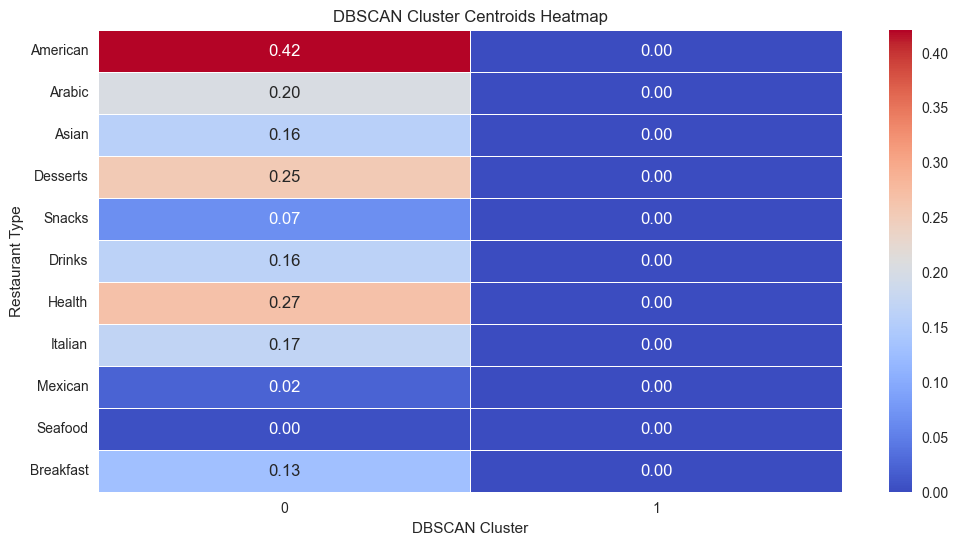

In [162]:
    cluster_centroids = trimmed_df_tfidf_scaled.groupby("DBSCAN_Cluster")[X_tfidf.columns].mean()
    plt.figure(figsize=(12, 6))
    sns.heatmap(cluster_centroids.T, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
    plt.title("DBSCAN Cluster Centroids Heatmap")
    plt.xlabel("DBSCAN Cluster")
    plt.ylabel("Restaurant Type")
    plt.show()

bad result and takes too long to run

### Hierarchical Clustering

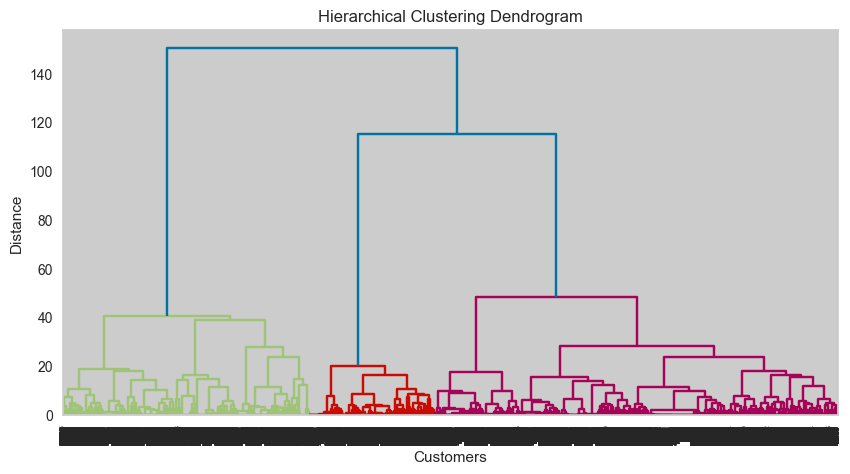

In [66]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
linkage_matrix = linkage(X_tfidf, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

In [69]:
from scipy.cluster.hierarchy import linkage, fcluster
num_clusters = 3
trimmed_df_tfidf_scaled['Hierarchical_Cluster'] = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
trimmed_df_tfidf_scaled

,customer_id,American,Arabic,Asian,Desserts,Snacks,Drinks,Health,Italian,Mexican,Seafood,Breakfast,KMeans_Cluster,KModes_Cluster,Hierarchical_Cluster
0,000THBA,0.639155,0.390793,0.000000,0.000000,0.000000,0.000000,0.294909,0.424689,0.0,0.0,0.414041,1,1,3
1,002510Y,0.000000,0.000000,0.981434,0.139184,0.000000,0.000000,0.131964,0.000000,0.0,0.0,0.000000,2,0,2
2,005ECL6,0.690752,0.000000,0.000000,0.224103,0.445452,0.000000,0.424955,0.305982,0.0,0.0,0.000000,1,2,3
3,0075AM7,0.000000,0.602969,0.000000,0.000000,0.000000,0.000000,0.455027,0.655270,0.0,0.0,0.000000,0,1,1
4,009UFS1,0.726417,0.507596,0.000000,0.202006,0.000000,0.000000,0.287290,0.137906,0.0,0.0,0.268896,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27437,ZZVGIVK,0.153596,0.000000,0.000000,0.298989,0.000000,0.000000,0.425218,0.816458,0.0,0.0,0.198997,1,2,3
27438,ZZVLIB5,0.202301,0.000000,0.961204,0.015146,0.000000,0.069493,0.172325,0.000000,0.0,0.0,0.020161,2,0,2
27439,ZZWKMGG,0.000000,0.365228,0.000000,0.000000,0.000000,0.889182,0.275617,0.000000,0.0,0.0,0.000000,0,1,1
27440,ZZY3N0D,0.380032,0.290449,0.000000,0.277414,0.091903,0.777838,0.175348,0.126257,0.0,0.0,0.184637,0,1,1


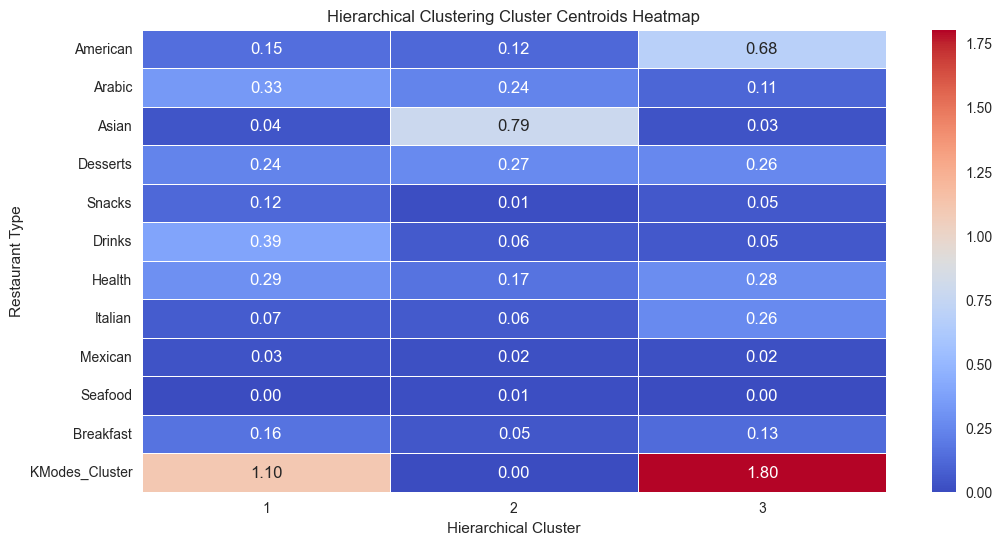

In [70]:
numerical_columns = [col for col in trimmed_df_tfidf_scaled.columns if col not in ['customer_id','KMeans_Cluster', 'Hierarchical_Cluster']]
cluster_centroids = trimmed_df_tfidf_scaled.groupby("Hierarchical_Cluster")[numerical_columns].mean()
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_centroids.T, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Hierarchical Clustering Cluster Centroids Heatmap")
plt.xlabel("Hierarchical Cluster")
plt.ylabel("Restaurant Type")
plt.show()

Cluster 1: American/Desserts/Health/Italian/Breakfast - Western

Cluster 2: Asian/Arabic/Dessert - Non-Western

Cluster 3: A mix of all - Balanced & Diverse Eaters

## Kmodes

In [46]:
trimmed_df_tfidf_scaled=trimmed_df_tfidf_scaled.drop(columns=['KMeans_Cluster'])
trimmed_df_tfidf_scaled

,customer_id,American,Arabic,Asian,Desserts,Snacks,Drinks,Health,Italian,Mexican,Seafood,Breakfast
0,000THBA,0.639155,0.390793,0.000000,0.000000,0.000000,0.000000,0.294909,0.424689,0.0,0.0,0.414041
1,002510Y,0.000000,0.000000,0.981434,0.139184,0.000000,0.000000,0.131964,0.000000,0.0,0.0,0.000000
2,005ECL6,0.690752,0.000000,0.000000,0.224103,0.445452,0.000000,0.424955,0.305982,0.0,0.0,0.000000
3,0075AM7,0.000000,0.602969,0.000000,0.000000,0.000000,0.000000,0.455027,0.655270,0.0,0.0,0.000000
4,009UFS1,0.726417,0.507596,0.000000,0.202006,0.000000,0.000000,0.287290,0.137906,0.0,0.0,0.268896
...,...,...,...,...,...,...,...,...,...,...,...,...
27437,ZZVGIVK,0.153596,0.000000,0.000000,0.298989,0.000000,0.000000,0.425218,0.816458,0.0,0.0,0.198997
27438,ZZVLIB5,0.202301,0.000000,0.961204,0.015146,0.000000,0.069493,0.172325,0.000000,0.0,0.0,0.020161
27439,ZZWKMGG,0.000000,0.365228,0.000000,0.000000,0.000000,0.889182,0.275617,0.000000,0.0,0.0,0.000000
27440,ZZY3N0D,0.380032,0.290449,0.000000,0.277414,0.091903,0.777838,0.175348,0.126257,0.0,0.0,0.184637


In [62]:
X_tfidf=trimmed_df_tfidf_scaled.drop(columns=['customer_id'])
X_tfidf

,American,Arabic,Asian,Desserts,Snacks,Drinks,Health,Italian,Mexican,Seafood,Breakfast,KMeans_Cluster
0,0.639155,0.390793,0.000000,0.000000,0.000000,0.000000,0.294909,0.424689,0.0,0.0,0.414041,1
1,0.000000,0.000000,0.981434,0.139184,0.000000,0.000000,0.131964,0.000000,0.0,0.0,0.000000,2
2,0.690752,0.000000,0.000000,0.224103,0.445452,0.000000,0.424955,0.305982,0.0,0.0,0.000000,1
3,0.000000,0.602969,0.000000,0.000000,0.000000,0.000000,0.455027,0.655270,0.0,0.0,0.000000,0
4,0.726417,0.507596,0.000000,0.202006,0.000000,0.000000,0.287290,0.137906,0.0,0.0,0.268896,1
...,...,...,...,...,...,...,...,...,...,...,...,...
27437,0.153596,0.000000,0.000000,0.298989,0.000000,0.000000,0.425218,0.816458,0.0,0.0,0.198997,1
27438,0.202301,0.000000,0.961204,0.015146,0.000000,0.069493,0.172325,0.000000,0.0,0.0,0.020161,2
27439,0.000000,0.365228,0.000000,0.000000,0.000000,0.889182,0.275617,0.000000,0.0,0.0,0.000000,0
27440,0.380032,0.290449,0.000000,0.277414,0.091903,0.777838,0.175348,0.126257,0.0,0.0,0.184637,0


In [46]:
from kmodes.kmodes import KModes
import pandas as pdb
num_clusters = 5  
# Apply K-Modes clustering
kmodes = KModes(n_clusters=num_clusters, init='Huang', n_init=5, random_state=123)
trimmed_df_tfidf_scaled['KModes_Cluster'] = kmodes.fit_predict(X_tfidf)


NameError: name 'X_tfidf' is not defined

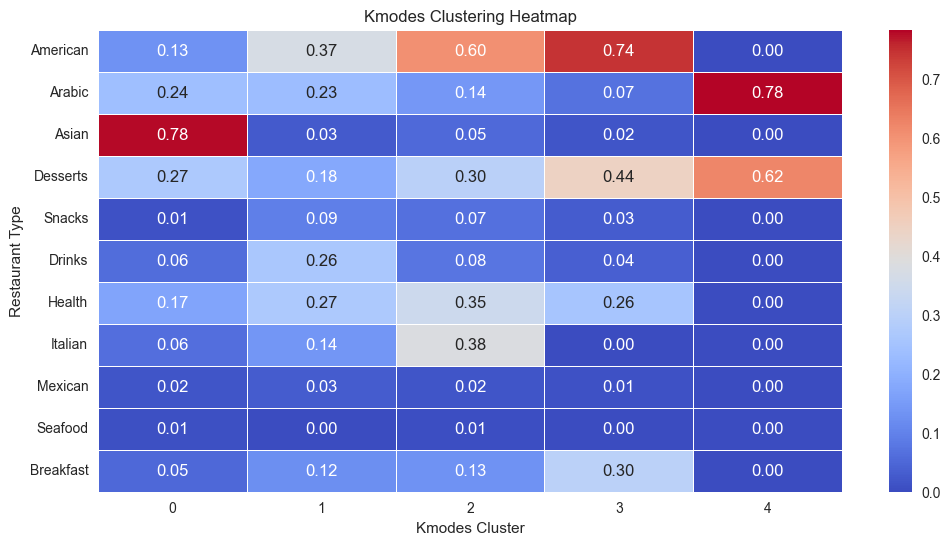

In [64]:
numerical_columns = [col for col in trimmed_df_tfidf_scaled.columns if col not in ['customer_id','KMeans_Cluster', 'Hierarchical_Cluster','KModes_Cluster']]
cluster_centroids = trimmed_df_tfidf_scaled.groupby("KModes_Cluster")[numerical_columns].mean()
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_centroids.T, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Kmodes Clustering Heatmap")
plt.xlabel("Kmodes Cluster")
plt.ylabel("Restaurant Type")
plt.show()

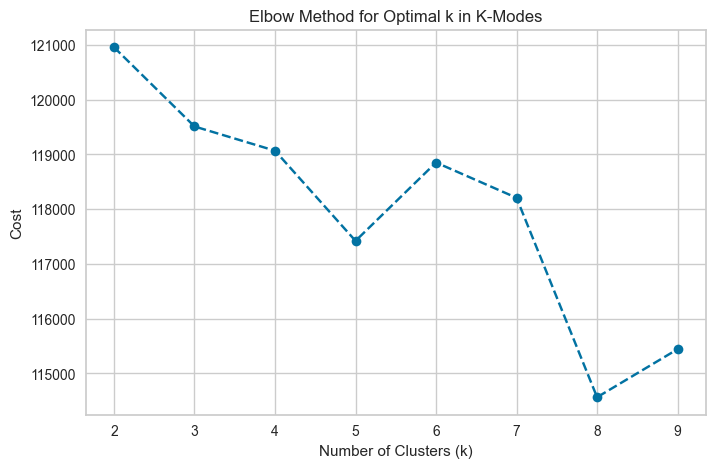

In [53]:
k_values = range(2, 10)  # Try different numbers of clusters
costs = []
for k in k_values:
    km = KModes(n_clusters=k, init='Huang', n_init=5, random_state=123)
    km.fit(X_tfidf)
    costs.append(km.cost_)

# Plot the cost function
plt.figure(figsize=(8, 5))
plt.plot(k_values, costs, marker="o", linestyle="--", color="b")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Cost")
plt.title("Elbow Method for Optimal k in K-Modes")
plt.show()

cluster 0: Western
Cluster 1: Western but more health concious
Cluster 2: Nonwestern

## Selection:

I think result from Hierarchical clustering shows stronger meaningful clusters than kmeans, though both are reasonable results.

## Behavior Segmentation Combine RFM with Resturant Preferences

In [76]:
segment=pd.read_csv("segment.csv")

/var/folders/t7/xczddm710m57x41dn5pwy_s80000gn/T/ipykernel_23677/541229447.py:1: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  segment=pd.read_csv("segment.csv")


In [77]:
segment.head()

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,LOCATION_TYPE,latitude,longitude,latitude_vendor,longtitude_vendor,vendor_category_en,delivery_charge,vendor_tag_name,order_date,Segment
0,163238.0,92PEE24,1.0,7.6,2,0,0.0,0.0,No,No,...,Other,-0.132100,-78.575297,-0.967769,0.080839,Restaurants,0.0,"American,Burgers,Free Delivery,Hot Dogs,Pasta",2019-08-01,churn_user
1,163240.0,QS68UD8,1.0,8.7,1,0,0.0,0.0,No,No,...,Work,-0.393396,-78.544417,-1.271979,0.028832,Restaurants,0.0,"Burgers,Desserts,Free Delivery,Grills,Mexican",2019-08-01,churn_user
2,163241.0,MB7VY5F,2.0,14.4,1,0,0.0,0.0,No,No,...,Other,-1.072823,-78.464121,-0.927944,0.145900,Restaurants,0.7,"Breakfast,Desserts,Salads,Arabic",2019-08-01,churn_user
3,163244.0,KDJ951Y,1.0,7.1,1,0,0.0,0.0,No,No,...,Home,-0.292713,-78.556316,-0.601096,0.095998,Restaurants,0.0,"American,Burgers,Desserts,Mojitos ,Pasta",2019-08-01,churn_user
4,163245.0,BAL0RVT,4.0,27.2,1,0,0.0,0.0,No,No,...,Work,-0.231810,-78.563513,-0.927944,0.145900,Restaurants,0.7,"Breakfast,Desserts,Salads,Arabic",2019-08-01,regular_user


In [83]:
trimmed_df_tfidf_scaled.head()

,customer_id,American,Arabic,Asian,Desserts,Snacks,Drinks,Health,Italian,Mexican,Seafood,Breakfast,KMeans_Cluster,KModes_Cluster,Hierarchical_Cluster
0,000THBA,0.639155,0.390793,0.000000,0.000000,0.000000,0.0,0.294909,0.424689,0.0,0.0,0.414041,1,1,3
1,002510Y,0.000000,0.000000,0.981434,0.139184,0.000000,0.0,0.131964,0.000000,0.0,0.0,0.000000,2,0,2
2,005ECL6,0.690752,0.000000,0.000000,0.224103,0.445452,0.0,0.424955,0.305982,0.0,0.0,0.000000,1,2,3
3,0075AM7,0.000000,0.602969,0.000000,0.000000,0.000000,0.0,0.455027,0.655270,0.0,0.0,0.000000,0,1,1
4,009UFS1,0.726417,0.507596,0.000000,0.202006,0.000000,0.0,0.287290,0.137906,0.0,0.0,0.268896,1,2,3


In [88]:
segment1 = segment.merge(trimmed_df_tfidf_scaled[['customer_id', 'KMeans_Cluster', 'Hierarchical_Cluster','KModes_Cluster']], on='customer_id', how='left')
cluster_name_mapping_kmeans = {
    0: "American/FastFood",
    1: "Asian",
    2: "Arabic"
}
cluster_name_mapping_hc = {
    1: "Western",
    2: "Non-Western",
    3: "Mixed"
}
cluster_name_mapping_km = {
    0: "Asian",
    1: "Balanced",
    2: "American/Italian",
    3: "Breakfast",
    4: "Arabic"
}
segment1['KMeans_Cluster'] = segment1['KMeans_Cluster'].map(cluster_name_mapping_kmeans)
segment1['Hierarchical_Cluster'] = segment1['Hierarchical_Cluster'].map(cluster_name_mapping_hc)
segment1['KModes_Cluster']= segment1['KModes_Cluster'].map(cluster_name_mapping_km)

In [85]:
## using Kmeans
cluster_distribution = segment1[['Segment','KMeans_Cluster']].value_counts(normalize=True)
cluster_distribution

Segment       KMeans_Cluster   
regular_user  Asian                0.272098
super_user    Asian                0.155041
regular_user  American/FastFood    0.128986
              Arabic               0.089346
super_user    American/FastFood    0.089087
lost_user     Asian                0.067655
super_user    Arabic               0.054912
lost_user     American/FastFood    0.047309
churn_user    Asian                0.041105
              American/FastFood    0.023688
lost_user     Arabic               0.017624
churn_user    Arabic               0.013149
Name: proportion, dtype: float64

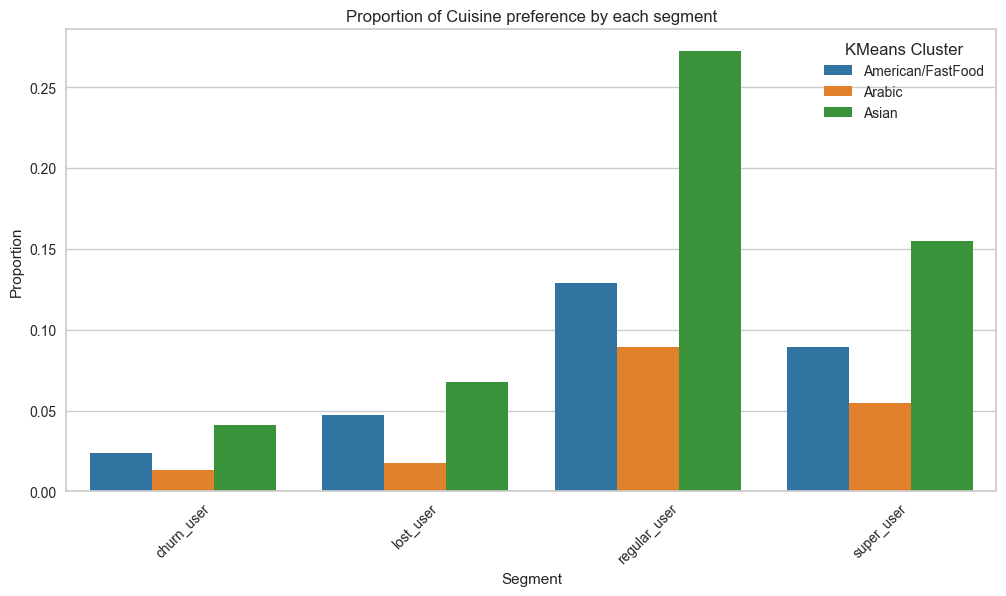

In [274]:
cluster_distribution = segment1.groupby(['Segment', 'KMeans_Cluster']).size().div(len(segment)).reset_index()
cluster_distribution.columns = ['Segment', 'KMeans_Cluster', 'Proportion']
# Plot the proportion of each KMeans cluster within each segment
plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_distribution, x="Segment", y="Proportion", hue="KMeans_Cluster", palette="tab10")

# Customize the plot
plt.title("Proportion of Cuisine preference by each segment")
plt.xlabel("Segment")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="KMeans Cluster")

# Show the plot
plt.show()

In [275]:
## use Hierarchical clustering
cluster_distribution = segment1[['Segment','Hierarchical_Cluster']].value_counts(normalize=True)
cluster_distribution

Segment       Hierarchical_Cluster
regular_user  Mixed                   0.262462
super_user    Mixed                   0.184727
regular_user  Western                 0.165151
super_user    Western                 0.080375
lost_user     Mixed                   0.064667
regular_user  Non-Western             0.062818
lost_user     Western                 0.051939
churn_user    Mixed                   0.045061
super_user    Non-Western             0.033938
churn_user    Western                 0.022165
lost_user     Non-Western             0.015982
churn_user    Non-Western             0.010716
Name: proportion, dtype: float64

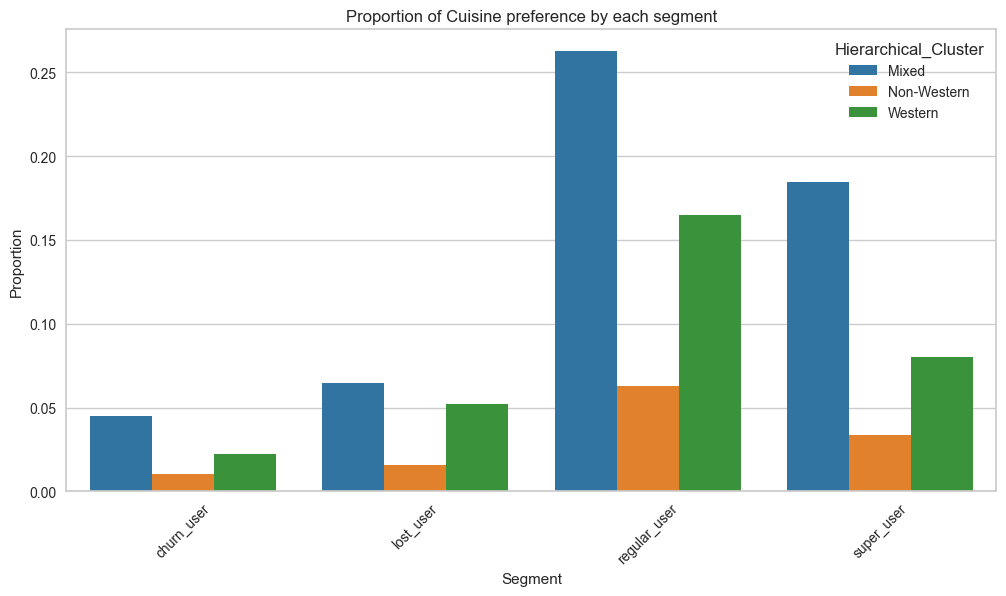

In [276]:
cluster_distribution = segment1.groupby(['Segment', 'Hierarchical_Cluster']).size().div(len(segment)).reset_index()
cluster_distribution.columns = ['Segment', 'Hierarchical_Cluster', 'Proportion']
# Plot the proportion of each KMeans cluster within each segment
plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_distribution, x="Segment", y="Proportion", hue="Hierarchical_Cluster", palette="tab10")

# Customize the plot
plt.title("Proportion of Cuisine preference by each segment")
plt.xlabel("Segment")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="Hierarchical_Cluster")

# Show the plot
plt.show()

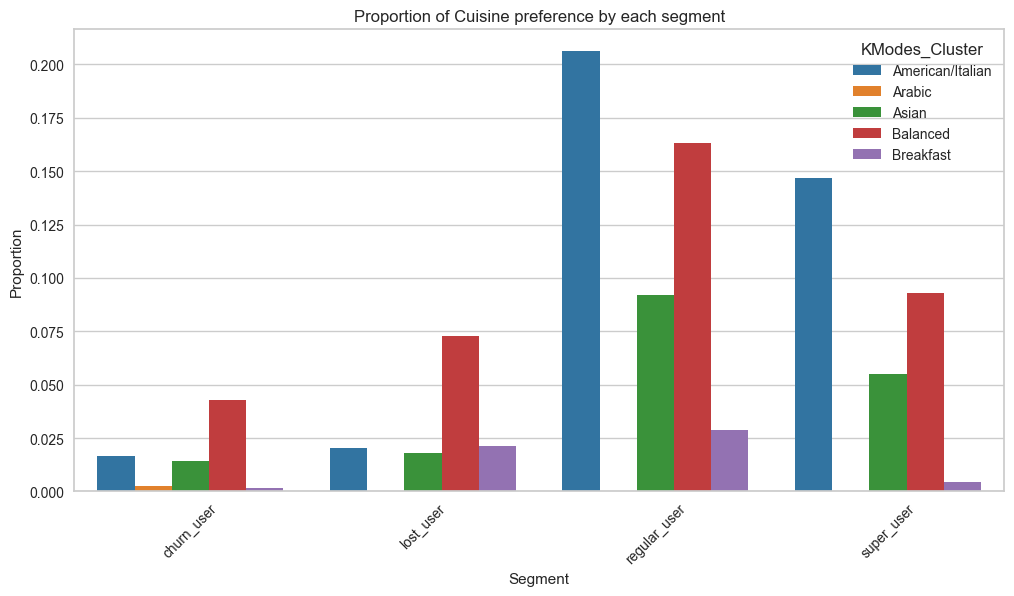

In [89]:
cluster_distribution = segment1.groupby(['Segment', 'KModes_Cluster']).size().div(len(segment)).reset_index()
cluster_distribution.columns = ['Segment', 'KModes_Cluster', 'Proportion']
# Plot the proportion of each KMeans cluster within each segment
plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_distribution, x="Segment", y="Proportion", hue="KModes_Cluster", palette="tab10")

# Customize the plot
plt.title("Proportion of Cuisine preference by each segment")
plt.xlabel("Segment")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="KModes_Cluster")

# Show the plot
plt.show()

In [87]:
segment1

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,latitude_vendor,longtitude_vendor,vendor_category_en,delivery_charge,vendor_tag_name,order_date,Segment,KMeans_Cluster,Hierarchical_Cluster,KModes_Cluster
0,163238.0,92PEE24,1.0,7.6,2,0,0.0,0.0,No,No,...,-0.967769,0.080839,Restaurants,0.0,"American,Burgers,Free Delivery,Hot Dogs,Pasta",2019-08-01,churn_user,Asian,Mixed,Western
1,163240.0,QS68UD8,1.0,8.7,1,0,0.0,0.0,No,No,...,-1.271979,0.028832,Restaurants,0.0,"Burgers,Desserts,Free Delivery,Grills,Mexican",2019-08-01,churn_user,Asian,Mixed,Western
2,163241.0,MB7VY5F,2.0,14.4,1,0,0.0,0.0,No,No,...,-0.927944,0.145900,Restaurants,0.7,"Breakfast,Desserts,Salads,Arabic",2019-08-01,churn_user,American/FastFood,Western,Western
3,163244.0,KDJ951Y,1.0,7.1,1,0,0.0,0.0,No,No,...,-0.601096,0.095998,Restaurants,0.0,"American,Burgers,Desserts,Mojitos ,Pasta",2019-08-01,churn_user,Asian,Mixed,Western
4,163245.0,BAL0RVT,4.0,27.2,1,0,0.0,0.0,No,No,...,-0.927944,0.145900,Restaurants,0.7,"Breakfast,Desserts,Salads,Arabic",2019-08-01,regular_user,American/FastFood,Western,Western
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135211,415507.0,L6LFY6H,1.0,13.3,2,0,0.0,0.0,No,No,...,-0.181038,0.490518,Restaurants,0.0,"Breakfast,Desserts,Grills,Milkshakes,Salads,Sa...",2020-02-29,regular_user,American/FastFood,Western,Western
135212,415508.0,2GMMVGI,3.0,9.5,1,0,0.0,0.0,No,Yes,...,0.634654,0.527255,Restaurants,0.0,"Burgers,Desserts,Free Delivery,Pasta,Sandwiches",2020-02-29,regular_user,Asian,Mixed,Non-Western
135213,415510.0,LYTAAV0,4.0,18.2,2,0,0.0,0.0,No,No,...,0.480602,0.552850,Restaurants,0.7,Burgers,2020-02-29,regular_user,Asian,Mixed,Non-Western
135214,415512.0,NEV9A5D,3.0,7.7,1,1,0.0,0.0,No,No,...,-0.496138,0.740214,Restaurants,0.0,"American,Breakfast,Burgers,Cafe,Desserts,Free ...",2020-02-29,lost_user,Asian,Mixed,Mixed
